# Лабораторная работа №5. Алгоритмы кластеризации данных
## Общее задание

Перед выполнением лабораторной работы необходимо загрузить набор данных в соответствии с вариантом на диск.
1. Произвести масштабирование признаков (scaling).
2. С использованием библиотеки [scikit-learn](http://scikit-learn.org/stable/) написать программу с использованием алгоритмов кластеризации данных, позволяющую разделить исходную выборку на классы, соответствующие предложенной вариантом задаче (http://scikit-learn.org/stable/modules/clustering.html).
3. Провести эксперименты и определить наилучший алгоритм кластеризации, параметры алгоритма. Необходимо использовать не менее 3-х алгоритмов.
Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).

K-Means: Silhouette Score = 0.373, Кластеров = 2
DBSCAN: Silhouette Score = 0.364, Кластеров = 3
Hierarchical: Silhouette Score = 0.368, Кластеров = 2

ЛУЧШИЙ АЛГОРИТМ: K-Means (Score: 0.373)


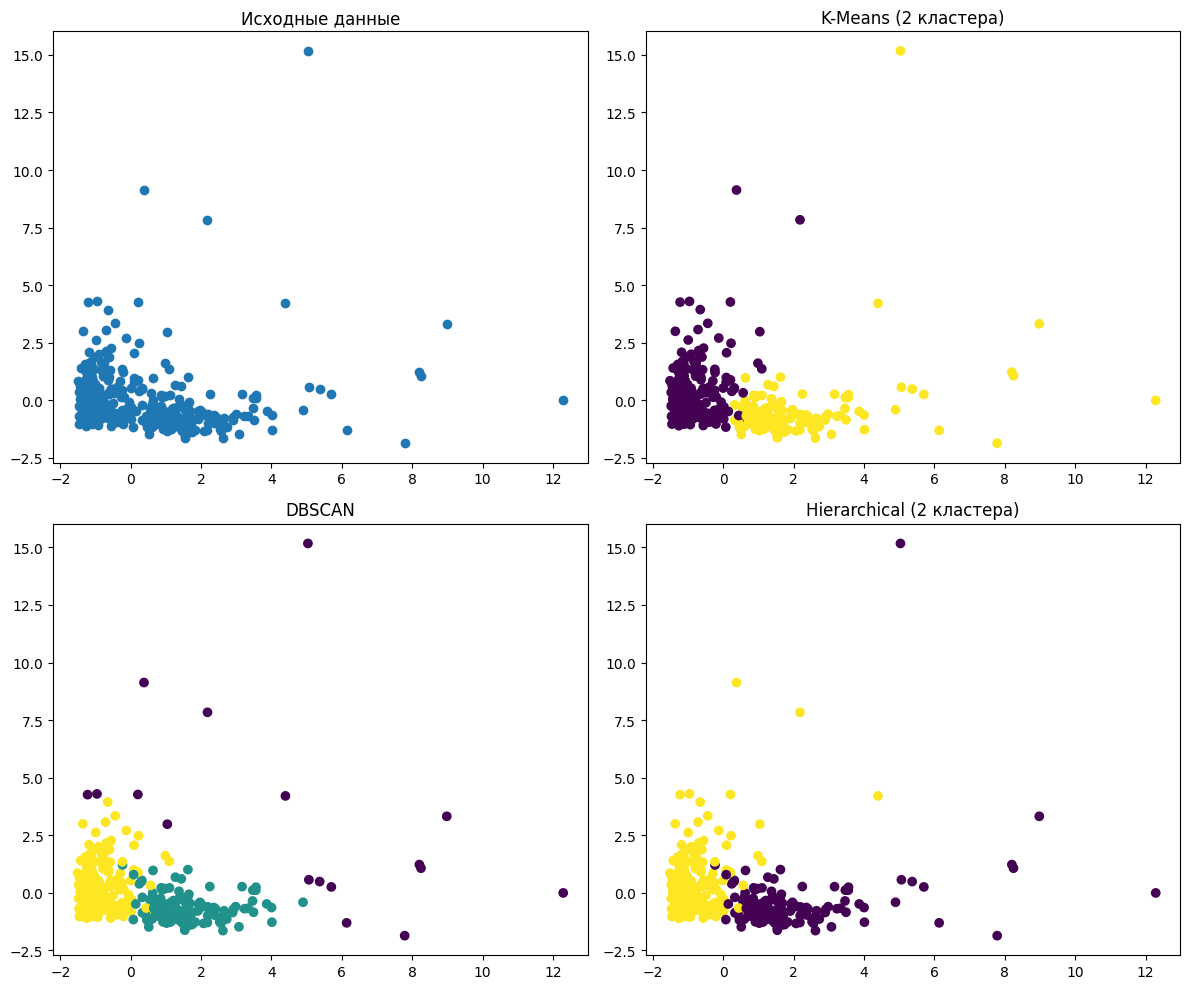

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

df = pd.read_csv('Wholesale customers data.csv')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  


results = {}

kmeans = KMeans(n_clusters=2)
labels_kmeans = kmeans.fit_predict(X_scaled)
results['K-Means'] = labels_kmeans


dbscan = DBSCAN(eps=2.0, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
results['DBSCAN'] = labels_dbscan


hierarchical = AgglomerativeClustering(n_clusters=2)
labels_hierarchical = hierarchical.fit_predict(X_scaled)
results['Hierarchical'] = labels_hierarchical



best_score = -1
best_algorithm = None

for name, labels in results.items():
    if len(set(labels)) > 1:
        score = silhouette_score(X_scaled, labels)
        print(f"{name}: Silhouette Score = {score:.3f}, Кластеров = {len(set(labels))}")
        
        if score > best_score:
            best_score = score
            best_algorithm = name
    else:
        print(f"{name}: не удалось создать кластеры")

print(f"\nЛУЧШИЙ АЛГОРИТМ: {best_algorithm} (Score: {best_score:.3f})")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))


axes[0,0].scatter(X_pca[:, 0], X_pca[:, 1])
axes[0,0].set_title('Исходные данные')



axes[0,1].scatter(X_pca[:, 0], X_pca[:, 1], c=results['K-Means'])
axes[0,1].set_title('K-Means (2 кластера)')


axes[1,0].scatter(X_pca[:, 0], X_pca[:, 1], c=results['DBSCAN'])
axes[1,0].set_title('DBSCAN')


axes[1,1].scatter(X_pca[:, 0], X_pca[:, 1], c=results['Hierarchical'])
axes[1,1].set_title('Hierarchical (2 кластера)')


plt.tight_layout()
plt.show()